In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## * 학생 비율들 구하기

# 학생 수

## 1. 초등학교 학생 수

In [2]:
# 초등학교
df1 = pd.read_excel('학생수 통계/초등학교_개황.xlsx')

In [3]:
print(df1['시도별(1)'].unique())

['총계' '서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '세종특별자치시'
 '경기도' '강원특별자치도' '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주특별자치도']


In [4]:
# 초등학생 수
element = df1[(df1['설립주체별(1)']=='계') & (df1['시도별(1)']=='총계') & (df1['학교현황별(2)']=='소계')]
element_total = sum(element['데이터'])
display(element)
print(f'2018~2023 초등학생 수 : {element_total}')

,학교급,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),데이터
0,초등학교,2018,계,총계,학생수 (명),소계,2711385
144,초등학교,2019,계,총계,학생수 (명),소계,2747219
288,초등학교,2020,계,총계,학생수 (명),소계,2693716
432,초등학교,2021,계,총계,학생수 (명),소계,2672340
576,초등학교,2022,계,총계,학생수 (명),소계,2664278
720,초등학교,2023,계,총계,학생수 (명),소계,2603929


2018~2023 초등학생 수 : 16092867


In [5]:
# 초등학생 여학생 수
element_girl = df1[(df1['설립주체별(1)']=='계') & (df1['시도별(1)']=='총계') & (df1['학교현황별(2)']=='여자')]
element_girl_total = sum(element_girl['데이터'])
element_boy_total = element_total - element_girl_total
display(element_girl)
print(f'2018~2023 초등학생 여학생 수 : {element_girl_total}')
print(f'2018~2023 초등학생 남학생 수 : {element_boy_total}')

,학교급,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),데이터
1,초등학교,2018,계,총계,학생수 (명),여자,1315080
145,초등학교,2019,계,총계,학생수 (명),여자,1334340
289,초등학교,2020,계,총계,학생수 (명),여자,1309376
433,초등학교,2021,계,총계,학생수 (명),여자,1300128
577,초등학교,2022,계,총계,학생수 (명),여자,1298067
721,초등학교,2023,계,총계,학생수 (명),여자,1270686


2018~2023 초등학생 여학생 수 : 7827677
2018~2023 초등학생 남학생 수 : 8265190


In [6]:
element_private = df1[(df1['설립주체별(1)']=='사립') & (df1['시도별(1)']=='총계') & (df1['학교현황별(2)']=='소계')]
element_private_total = sum(element_private['데이터'].values)
display(element_private)
print(f'사립 초등학생 수 : {element_private_total}')


,학교급,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),데이터
108,초등학교,2018,사립,총계,학생수 (명),소계,38121
252,초등학교,2019,사립,총계,학생수 (명),소계,37969
396,초등학교,2020,사립,총계,학생수 (명),소계,37719
540,초등학교,2021,사립,총계,학생수 (명),소계,38324
684,초등학교,2022,사립,총계,학생수 (명),소계,39238
828,초등학교,2023,사립,총계,학생수 (명),소계,39278


사립 초등학생 수 : 230649


In [7]:
element_public = df1[(df1['설립주체별(1)'].isin(['국립', '공립'])) & (df1['시도별(1)']=='총계') & (df1['학교현황별(2)']=='소계')]
element_public_total = sum(element_public['데이터'].values)
display(element_public)
print(f'국공립 초등학생 수 : {element_public_total}')

,학교급,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),데이터
36,초등학교,2018,국립,총계,학생수 (명),소계,8862
72,초등학교,2018,공립,총계,학생수 (명),소계,2664402
180,초등학교,2019,국립,총계,학생수 (명),소계,8783
216,초등학교,2019,공립,총계,학생수 (명),소계,2700467
324,초등학교,2020,국립,총계,학생수 (명),소계,8697
360,초등학교,2020,공립,총계,학생수 (명),소계,2647300
468,초등학교,2021,국립,총계,학생수 (명),소계,8557
504,초등학교,2021,공립,총계,학생수 (명),소계,2625459
612,초등학교,2022,국립,총계,학생수 (명),소계,8369
648,초등학교,2022,공립,총계,학생수 (명),소계,2616671


국공립 초등학생 수 : 15862218


In [8]:
# 지역별 학생수
element_area = df1[(df1['설립주체별(1)']=='계') & (df1['시도별(1)']!='총계') & (df1['학교현황별(2)']=='소계')]
element_area_total = element_area.groupby('시도별(1)')['데이터'].sum().reset_index()
element_area_total

,시도별(1),데이터
0,강원특별자치도,437708
1,경기도,4569716
2,경상남도,1134670
3,경상북도,769091
4,광주광역시,514688
5,대구광역시,736661
6,대전광역시,475735
7,부산광역시,922889
8,서울특별시,2430068
9,세종특별자치시,177814


In [9]:
# 학년별 학생수 (출처: https://kess.kedi.re.kr/mobile/stats/school?menuCd=0101&cd=6813&survSeq=2023&itemCode=01&menuId=m_010109&uppCd1=010109&uppCd2=010109&flag=B)
element_grade_2018 = [460403, 456806, 432777, 451635, 476043, 433721]
element_grade_2019 = [472947, 458840, 456066, 432282, 451185, 475899]
element_grade_2020 = [426484, 471054, 458247, 455478, 431638, 450815]
element_grade_2021 = [427226, 425516, 471768, 458905, 456378, 432547]
element_grade_2022 = [431222, 424081, 424454, 470779, 458085, 455657]
element_grade_2023 = [401752, 427809, 423154, 423680, 469860, 457674]
lst = [element_grade_2018, element_grade_2019, element_grade_2020, element_grade_2021, element_grade_2022, element_grade_2023]

element_grade = pd.DataFrame(lst, columns=['1학년', '2학년', '3학년', '4학년', '5학년', '6학년'], index=[2018, 2019, 2020, 2021, 2022, 2023])
display(element_grade)

element_grade_total = element_grade.sum().reset_index()

element_grade_total

,1학년,2학년,3학년,4학년,5학년,6학년
2018,460403,456806,432777,451635,476043,433721
2019,472947,458840,456066,432282,451185,475899
2020,426484,471054,458247,455478,431638,450815
2021,427226,425516,471768,458905,456378,432547
2022,431222,424081,424454,470779,458085,455657
2023,401752,427809,423154,423680,469860,457674


,index,0
0,1학년,2620034
1,2학년,2664106
2,3학년,2666466
3,4학년,2692759
4,5학년,2743189
5,6학년,2706313


## 2. 중학교 학생 수

In [10]:
df2 = pd.read_excel('학생수 통계/중학교_개황_20240717130653.xlsx')
df2.head()

/Users/yejin/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
0,2018,계,총계,학교수 (개),소계,소계,3214
1,2018,계,총계,학생수 (명),소계,소계,1334288
2,2018,계,총계,학생수 (명),여자,소계,640686
3,2018,계,총계,학생수 (명),1학년,소계,416848
4,2018,계,총계,학생수 (명),1학년,여자,200540


In [11]:
middle = df2[(df2['설립주체별(1)']=='계') & (df2['시도별(1)']=='총계') & (df2['학교현황별(1)']=='학생수 (명)') & (df2['학교현황별(2)']=='소계')]
middle_total = sum(middle['데이터'])
display(middle)
print(f'2018~2023 중학생 수 : {middle_total}')

,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
1,2018,계,총계,학생수 (명),소계,소계,1334288
649,2019,계,총계,학생수 (명),소계,소계,1294559
1297,2020,계,총계,학생수 (명),소계,소계,1315846
1945,2021,계,총계,학생수 (명),소계,소계,1350770
2593,2022,계,총계,학생수 (명),소계,소계,1348428
3241,2023,계,총계,학생수 (명),소계,소계,1326831


2018~2023 중학생 수 : 7970722


In [12]:
# 중학생 여학생 수
middle_girl = df2[(df2['설립주체별(1)']=='계') & (df2['시도별(1)']=='총계') & (df2['학교현황별(2)']=='여자') & (df2['학교현황별(1)']=='학생수 (명)')]
middle_girl_total = sum(middle_girl['데이터'])
middle_boy_total = middle_total - middle_girl_total
display(middle_girl)
print(f'2018~2023 중학생 여학생 수 : {middle_girl_total}')
print(f'2018~2023 중학생 남학생 수 : {middle_boy_total}')

,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
2,2018,계,총계,학생수 (명),여자,소계,640686
650,2019,계,총계,학생수 (명),여자,소계,623115
1298,2020,계,총계,학생수 (명),여자,소계,635421
1946,2021,계,총계,학생수 (명),여자,소계,654046
2594,2022,계,총계,학생수 (명),여자,소계,653883
3242,2023,계,총계,학생수 (명),여자,소계,643064


2018~2023 중학생 여학생 수 : 3850215
2018~2023 중학생 남학생 수 : 4120507


In [13]:
middle_private = df2[(df2['설립주체별(1)']=='사립') & (df2['시도별(1)']=='총계') & (df2['학교현황별(1)']=='학생수 (명)') & (df2['학교현황별(2)']=='소계')]
middle_private_total = sum(middle_private['데이터'])
display(middle_private)
print(f'사립 중학생 수 : {middle_private_total}')

,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
487,2018,사립,총계,학생수 (명),소계,소계,226200
1135,2019,사립,총계,학생수 (명),소계,소계,216778
1783,2020,사립,총계,학생수 (명),소계,소계,216693
2431,2021,사립,총계,학생수 (명),소계,소계,219121
3079,2022,사립,총계,학생수 (명),소계,소계,216936
3727,2023,사립,총계,학생수 (명),소계,소계,211573


사립 중학생 수 : 1307301


In [14]:
middle_public = df2[df2['설립주체별(1)'].isin(['국립', '공립']) & (df2['시도별(1)']=='총계') & (df2['학교현황별(2)']=='소계') & (df2['학교현황별(1)']=='학생수 (명)')]
middle_public_total = sum(middle_public['데이터'].values)
display(middle_public)
print(f'국공립 중학생 수 : {middle_public_total}')

,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
163,2018,국립,총계,학생수 (명),소계,소계,4222
325,2018,공립,총계,학생수 (명),소계,소계,1103866
811,2019,국립,총계,학생수 (명),소계,소계,4087
973,2019,공립,총계,학생수 (명),소계,소계,1073694
1459,2020,국립,총계,학생수 (명),소계,소계,4065
1621,2020,공립,총계,학생수 (명),소계,소계,1095088
2107,2021,국립,총계,학생수 (명),소계,소계,3987
2269,2021,공립,총계,학생수 (명),소계,소계,1127662
2755,2022,국립,총계,학생수 (명),소계,소계,3930
2917,2022,공립,총계,학생수 (명),소계,소계,1127562


국공립 중학생 수 : 6663421


In [15]:
# 지역별
middle_area = df2[(df2['설립주체별(1)']=='계') & (df2['시도별(1)']!='총계') & (df2['학교현황별(1)']=='학생수 (명)') & (df2['학교현황별(2)']=='소계') & (df2['학교현황별(3)']=='소계')]
middle_area_total = middle_area.groupby('시도별(1)')['데이터'].sum().reset_index()
middle_area_total

,시도별(1),데이터
0,강원특별자치도,227610
1,경기도,2210291
2,경상남도,553650
3,경상북도,377469
4,광주광역시,262053
5,대구광역시,376643
6,대전광역시,244592
7,부산광역시,448848
8,서울특별시,1244608
9,세종특별자치시,77798


In [16]:
# 학년별 학생수
middle_grade = df2[(df2['설립주체별(1)']=='계') & (df2['시도별(1)']=='총계') & (df2['학교현황별(1)']=='학생수 (명)') & (df2['학교현황별(3)']=='소계') & (df2['학교현황별(2)']!='여자') & (df2['학교현황별(2)']!='소계')]
middle_grade_total = middle_grade.groupby('학교현황별(2)')['데이터'].sum().reset_index()
display(middle_grade)
middle_grade_total

,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
3,2018,계,총계,학생수 (명),1학년,소계,416848
5,2018,계,총계,학생수 (명),2학년,소계,450253
7,2018,계,총계,학생수 (명),3학년,소계,467187
651,2019,계,총계,학생수 (명),1학년,소계,431245
653,2019,계,총계,학생수 (명),2학년,소계,415189
655,2019,계,총계,학생수 (명),3학년,소계,448125
1299,2020,계,총계,학생수 (명),1학년,소계,473365
1301,2020,계,총계,학생수 (명),2학년,소계,429302
1303,2020,계,총계,학생수 (명),3학년,소계,413179
1947,2021,계,총계,학생수 (명),1학년,소계,449537


,학교현황별(2),데이터
0,1학년,2654308
1,2학년,2642821
2,3학년,2673593


## 3. 고등학교 학생 수

In [17]:
df3 = pd.read_excel('학생수 통계/고등학교_개황_20240717130230.xlsx')
df3.head()

/Users/yejin/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
0,2018,계,총계,학교수 (개),소계,소계,2358
1,2018,계,총계,학생수 (명),소계,소계,1538576
2,2018,계,총계,학생수 (명),여자,소계,733769
3,2018,계,총계,학생수 (명),1학년,소계,457674
4,2018,계,총계,학생수 (명),1학년,여자,217889


In [18]:
high = df3[(df3['설립주체별(1)']=='계') & (df3['시도별(1)']=='총계') & (df3['학교현황별(1)']=='학생수 (명)') & (df3['학교현황별(2)']=='소계')]
high_total = sum(high['데이터'])
display(high)
print(f'2018~2023 고등학생 수 : {high_total}')

,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
1,2018,계,총계,학생수 (명),소계,소계,1538576
649,2019,계,총계,학생수 (명),소계,소계,1411027
1297,2020,계,총계,학생수 (명),소계,소계,1337312
1945,2021,계,총계,학생수 (명),소계,소계,1299965
2593,2022,계,총계,학생수 (명),소계,소계,1262348
3241,2023,계,총계,학생수 (명),소계,소계,1278269


2018~2023 고등학생 수 : 8127497


In [19]:
# 고등학생 여학생 수
high_girl = df3[(df3['설립주체별(1)']=='계') & (df3['시도별(1)']=='총계') & (df3['학교현황별(1)']=='학생수 (명)') & (df3['학교현황별(2)']=='여자')]
high_girl_total = sum(high_girl['데이터'])
high_boy_total = high_total - high_girl_total
display(high_girl)
print(f'2018~2023 고등학생 여학생 수 : {high_girl_total}')
print(f'2018~2023 고등학생 남학생 수 : {high_boy_total}')

,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
2,2018,계,총계,학생수 (명),여자,소계,733769
650,2019,계,총계,학생수 (명),여자,소계,673802
1298,2020,계,총계,학생수 (명),여자,소계,639232
1946,2021,계,총계,학생수 (명),여자,소계,624355
2594,2022,계,총계,학생수 (명),여자,소계,607733
3242,2023,계,총계,학생수 (명),여자,소계,616306


2018~2023 고등학생 여학생 수 : 3895197
2018~2023 고등학생 남학생 수 : 4232300


In [20]:
# 사립 고등학교 학생 수
high_private = df3[(df3['설립주체별(1)']=='사립') & (df3['시도별(1)']=='총계') & (df3['학교현황별(1)']=='학생수 (명)') & (df3['학교현황별(2)']=='소계')]
high_private_total = sum(high_private['데이터'])
display(high_private)
print(f'사립 고등학생 수 : {high_private_total}')

,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
487,2018,사립,총계,학생수 (명),소계,소계,651072
1135,2019,사립,총계,학생수 (명),소계,소계,594586
1783,2020,사립,총계,학생수 (명),소계,소계,560869
2431,2021,사립,총계,학생수 (명),소계,소계,541425
3079,2022,사립,총계,학생수 (명),소계,소계,519878
3727,2023,사립,총계,학생수 (명),소계,소계,519009


사립 고등학생 수 : 3386839


In [21]:
# 공립 고등학생 수
high_public = df3[(df3['설립주체별(1)'].isin(['국립', '공립'])) & (df3['시도별(1)']=='총계') & (df3['학교현황별(1)']=='학생수 (명)') & (df3['학교현황별(2)']=='소계') & (df3['학교현황별(3)']=='소계')]
high_public_total = sum(high_public['데이터'].values)
display(high_public)
print(f'국공립 고등학생 수 : {high_public_total}')

,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
163,2018,국립,총계,학생수 (명),소계,소계,12577
325,2018,공립,총계,학생수 (명),소계,소계,874927
811,2019,국립,총계,학생수 (명),소계,소계,11982
973,2019,공립,총계,학생수 (명),소계,소계,804459
1459,2020,국립,총계,학생수 (명),소계,소계,11586
1621,2020,공립,총계,학생수 (명),소계,소계,764857
2107,2021,국립,총계,학생수 (명),소계,소계,11284
2269,2021,공립,총계,학생수 (명),소계,소계,747256
2755,2022,국립,총계,학생수 (명),소계,소계,10925
2917,2022,공립,총계,학생수 (명),소계,소계,731545


국공립 고등학생 수 : 4740658


In [22]:
# 지역별 고등학생 수
high_area = df3[(df3['설립주체별(1)']=='계') & (df3['시도별(1)']!='총계') & (df3['학교현황별(1)']=='학생수 (명)') & (df3['학교현황별(2)']=='소계') & (df3['학교현황별(3)']=='소계')]
high_area_total = high_area.groupby('시도별(1)')['데이터'].sum().reset_index()
high_area_total

,시도별(1),데이터
0,강원특별자치도,241106
1,경기도,2142413
2,경상남도,543328
3,경상북도,407512
4,광주광역시,275890
5,대구광역시,397020
6,대전광역시,255722
7,부산광역시,463456
8,서울특별시,1350050
9,세종특별자치시,63041


In [23]:
# 학년별 고등학생 수
high_grade = df3[(df3['설립주체별(1)']=='계') & (df3['시도별(1)']=='총계') & (df3['학교현황별(1)']=='학생수 (명)') & (df3['학교현황별(2)']!='소계') & (df3['학교현황별(2)']!='여자') & (df3['학교현황별(3)']=='소계')]
high_grade_total = high_grade.groupby('학교현황별(2)')['데이터'].sum().reset_index()
display(high_grade)
high_grade_total

,시점,설립주체별(1),시도별(1),학교현황별(1),학교현황별(2),학교현황별(3),데이터
3,2018,계,총계,학생수 (명),1학년,소계,457674
5,2018,계,총계,학생수 (명),2학년,소계,510241
7,2018,계,총계,학생수 (명),3학년,소계,570661
651,2019,계,총계,학생수 (명),1학년,소계,463932
653,2019,계,총계,학생수 (명),2학년,소계,445479
655,2019,계,총계,학생수 (명),3학년,소계,501616
1299,2020,계,총계,학생수 (명),1학년,소계,447236
1301,2020,계,총계,학생수 (명),2학년,소계,452126
1303,2020,계,총계,학생수 (명),3학년,소계,437950
1947,2021,계,총계,학생수 (명),1학년,소계,413882


,학교현황별(2),데이터
0,1학년,2678190
1,2학년,2666449
2,3학년,2782858


## 초+중+고등학생 종합

### 정리

In [24]:
# 전체 학생 수
students = element_total + middle_total + high_total
students

32191086

In [25]:
# 초 중 고등학교 학생 수
print('(초 중 고)')
element_total, middle_total, high_total

(초 중 고)


(16092867, 7970722, 8127497)

In [26]:
# 남 여 학생 수
boys = element_boy_total + middle_boy_total + high_boy_total
girls = element_girl_total + middle_girl_total + high_girl_total
print('(남 여)')
boys, girls

(남 여)


(16617997, 15573089)

In [27]:
# 사립 공립 학생 수
privates = element_private_total + middle_private_total + high_private_total
publics = element_public_total + middle_public_total + high_public_total
print('(사립 국공립)')
privates, publics

(사립 국공립)


(4924789, 27266297)

In [28]:
# 학년별 학생 수
merge_grades = pd.merge(element_grade_total, middle_grade_total, left_on='index', right_on='학교현황별(2)', how='outer').fillna(0)

merge_grades['학생수'] = merge_grades[0] + merge_grades['데이터']
# merge_grades[['index', '학생수']]

merge_grades2 = pd.merge(merge_grades, high_grade_total, left_on='index', right_on='학교현황별(2)', how='outer').fillna(0)

merge_grades2['학생수'] = merge_grades2[0] + merge_grades2['데이터_x'] + merge_grades2['데이터_y']
# display(merge_grades2)
grades = merge_grades2[['index', '학생수']]
grades

,index,학생수
0,1학년,7952532
1,2학년,7973376
2,3학년,8122917
3,4학년,2692759
4,5학년,2743189
5,6학년,2706313


In [29]:
# 지역별 학생 수
areas = high_area_total['데이터'] + middle_area_total['데이터'] + element_area_total['데이터']
areas = pd.DataFrame(areas)

areas = pd.concat([high_area_total['시도별(1)'], areas], axis=1)
areas

,시도별(1),데이터
0,강원특별자치도,906424
1,경기도,8922420
2,경상남도,2231648
3,경상북도,1554072
4,광주광역시,1052631
5,대구광역시,1510324
6,대전광역시,976049
7,부산광역시,1835193
8,서울특별시,5024726
9,세종특별자치시,318653


# 사고 건수

In [30]:
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel('0714 전처리 버전.xlsx')
df.head()

,구분,학교급,지역,교육청,설립유형,사고자구분,사고자성별,사고자학년,사고발생일,사고발생요일,사고발생시각,사고시간,사고장소,사고부위,사고형태,사고당시활동,사고매개물
0,D0071516,중학교,경기,경기도교육청,공립,교직원(계약직),남,NaN,2018-01-01,월,13:00:00,휴식시간 및 청소시간,운동장,다리,낙상-넘어짐,구기운동,자연(사람/동물/식물 등)
1,A0005604,중학교,경기,성남교육지원청,공립,일반학생,남,2학년,2018-01-08,월,11:20:00,수업시간,교실,치아(구강),물리적힘 노출,공부,가구(책상/의자/책장/탁자/침대 등)
2,A0122533,중학교,경북,영천교육지원청,사립,체육특기학생,남,2학년,2018-01-09,화,07:00:00,특별활동,부속시설,발,물리적힘 노출,기타운동,자연(사람/동물/식물 등)
3,A0001949,중학교,강원,횡성교육지원청,사립,일반학생,여,2학년,2018-01-10,수,11:10:00,체육수업,부속시설,발,낙상-넘어짐,기타운동,운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)
4,A0002466,고등학교,충북,충청북도교육청,공립,일반학생,남,1학년,2018-01-10,수,19:00:00,수업시간,운동장,다리,낙상-미끄러짐,구기운동,기타


In [32]:
print(f'총 사고 건수: {len(df)}')
print(df['학교급'].unique())
print(df['지역'].unique())
# print(df['교육청'].unique())
print(df['설립유형'].unique())

총 사고 건수: 616008
['중학교' '고등학교' '초등학교' '유치원' '기타학교' '특수학교']
['경기' '경북' '강원' '충북' '경남' '전남' '충남' '세종' '부산' '서울' '대구' '인천' '울산' '전북'
 '광주' '대전' '제주']
['공립' '사립' '국립']


In [33]:
# 사고 건수

# 학교급 사고 건수
kinder_case = len(df[df['학교급'] == '유치원'])
element_case = len(df[df['학교급'] == '초등학교'])
middle_case = len(df[df['학교급'] == '중학교'])
high_case = len(df[df['학교급'] == '고등학교'])
cases = [element_case, middle_case, high_case]

print(f'유치원 사고 건수: {kinder_case}')
print(f'초등학교 사고 건수: {element_case}')
print(f'중학교 사고 건수: {middle_case}')
print(f'고등학교 사고 건수: {high_case}')

유치원 사고 건수: 42929
초등학교 사고 건수: 220309
중학교 사고 건수: 217319
고등학교 사고 건수: 130911


In [34]:
# 성별 사고 건수
boy_case = len(df[df['사고자성별']=='남'])
girl_case = len(df[df['사고자성별']=='여'])

print(boy_case, girl_case)

411953 204055


In [35]:
# 설립유형별 사고건수
private_case = len(df[df['설립유형']=='사립'])
public_case = len(df[df['설립유형']=='국립']) + len(df[df['설립유형']=='공립'])

print(private_case, public_case)

115064 500944


In [69]:
# 학년별 사고건수
school_grades = ['초등1학년', '초등2학년', '초등3학년', '초등4학년', '초등5학년', '초등6학년', '중등1학년', '중등2학년', '중등3학년', '고등1학년', '고등2학년', '고등3학년']

grades = pd.DataFrame(school_grades)
grades['학생수'] = 0
grades['사고건수'] = 0
grades

,0,학생수,사고건수
0,초등1학년,0,0
1,초등2학년,0,0
2,초등3학년,0,0
3,초등4학년,0,0
4,초등5학년,0,0
5,초등6학년,0,0
6,중등1학년,0,0
7,중등2학년,0,0
8,중등3학년,0,0
9,고등1학년,0,0


In [37]:
grades.loc[grades[0]=='초등1학년', '학생수'] = element_grade_total.loc[element_grade_total['index']=='1학년', 0]
grades.loc[grades[0]=='초등2학년', '학생수'] = element_grade_total.loc[element_grade_total['index']=='2학년', 0]
grades.loc[grades[0]=='초등3학년', '학생수'] = element_grade_total.loc[element_grade_total['index']=='3학년', 0]
grades.loc[grades[0]=='초등4학년', '학생수'] = element_grade_total.loc[element_grade_total['index']=='4학년', 0]
grades.loc[grades[0]=='초등5학년', '학생수'] = element_grade_total.loc[element_grade_total['index']=='5학년', 0]
grades.loc[grades[0]=='초등6학년', '학생수'] = element_grade_total.loc[element_grade_total['index']=='6학년', 0]

grades.loc[grades[0]=='중등1학년', '학생수'] = middle_grade_total.loc[middle_grade_total['학교현황별(2)']=='1학년', '데이터'].values[0]
grades.loc[grades[0]=='중등2학년', '학생수'] = middle_grade_total.loc[middle_grade_total['학교현황별(2)']=='2학년', '데이터'].values[0]
grades.loc[grades[0]=='중등3학년', '학생수'] = middle_grade_total.loc[middle_grade_total['학교현황별(2)']=='3학년', '데이터'].values[0]

grades.loc[grades[0]=='고등1학년', '학생수'] = high_grade_total.loc[high_grade_total['학교현황별(2)']=='1학년', '데이터'].values[0]
grades.loc[grades[0]=='고등2학년', '학생수'] = high_grade_total.loc[high_grade_total['학교현황별(2)']=='2학년', '데이터'].values[0]
grades.loc[grades[0]=='고등3학년', '학생수'] = high_grade_total.loc[high_grade_total['학교현황별(2)']=='3학년', '데이터'].values[0]

grades

,0,학생수,사고건수
0,초등1학년,2620034,0
1,초등2학년,2664106,0
2,초등3학년,2666466,0
3,초등4학년,2692759,0
4,초등5학년,2743189,0
5,초등6학년,2706313,0
6,중등1학년,2654308,0
7,중등2학년,2642821,0
8,중등3학년,2673593,0
9,고등1학년,2678190,0


In [52]:
grades.loc[grades[0]=='초등1학년', '사고건수'] = len(df[(df['사고자학년']=='1학년') & (df['학교급']=='초등학교')])
grades.loc[grades[0]=='초등2학년', '사고건수'] = len(df[(df['사고자학년']=='2학년') & (df['학교급']=='초등학교')])
grades.loc[grades[0]=='초등3학년', '사고건수'] = len(df[(df['사고자학년']=='3학년') & (df['학교급']=='초등학교')])
grades.loc[grades[0]=='초등4학년', '사고건수'] = len(df[(df['사고자학년']=='4학년') & (df['학교급']=='초등학교')])
grades.loc[grades[0]=='초등5학년', '사고건수'] = len(df[(df['사고자학년']=='5학년') & (df['학교급']=='초등학교')])
grades.loc[grades[0]=='초등6학년', '사고건수'] = len(df[(df['사고자학년']=='6학년') & (df['학교급']=='초등학교')])
grades.loc[grades[0]=='중등1학년', '사고건수'] = len(df[(df['사고자학년']=='1학년') & (df['학교급']=='중학교')])
grades.loc[grades[0]=='중등2학년', '사고건수'] = len(df[(df['사고자학년']=='2학년') & (df['학교급']=='중학교')])
grades.loc[grades[0]=='중등3학년', '사고건수'] = len(df[(df['사고자학년']=='3학년') & (df['학교급']=='중학교')])
grades.loc[grades[0]=='고등1학년', '사고건수'] = len(df[(df['사고자학년']=='1학년') & (df['학교급']=='고등학교')])
grades.loc[grades[0]=='고등2학년', '사고건수'] = len(df[(df['사고자학년']=='2학년') & (df['학교급']=='고등학교')])
grades.loc[grades[0]=='고등3학년', '사고건수'] = len(df[(df['사고자학년']=='3학년') & (df['학교급']=='고등학교')])

grades

,0,학생수,사고건수
0,초등1학년,2620034,24790
1,초등2학년,2664106,24865
2,초등3학년,2666466,29910
3,초등4학년,2692759,37694
4,초등5학년,2743189,47917
5,초등6학년,2706313,54443
6,중등1학년,2654308,77146
7,중등2학년,2642821,70414
8,중등3학년,2673593,69506
9,고등1학년,2678190,49484


In [49]:
len(df[(df['사고자학년']=='1학년') & (df['학교급']=='초등학교')])

24790

In [45]:
df.isna().sum()

구분           0
학교급          0
지역           0
교육청          0
설립유형         0
사고자구분        1
사고자성별        0
사고자학년     1607
사고발생일        0
사고발생요일       0
사고발생시각       0
사고시간         0
사고장소         0
사고부위         0
사고형태         0
사고당시활동       0
사고매개물        0
dtype: int64

In [111]:
# 지역별
areas.columns = ['시도별', '학생수']
areas['사고건수'] = 0
areas

,시도별,학생수,사고건수
0,강원특별자치도,906424,0
1,경기도,8922420,0
2,경상남도,2231648,0
3,경상북도,1554072,0
4,광주광역시,1052631,0
5,대구광역시,1510324,0
6,대전광역시,976049,0
7,부산광역시,1835193,0
8,서울특별시,5024726,0
9,세종특별자치시,318653,0


In [112]:
areas.loc[areas['시도별']=='강원특별자치도', '사고건수'] = len(df[df['지역']=='강원'])
areas.loc[areas['시도별']=='경기도', '사고건수'] = len(df[df['지역']=='경기'])
areas.loc[areas['시도별']=='경상남도', '사고건수'] = len(df[df['지역']=='경남'])
areas.loc[areas['시도별']=='경상북도', '사고건수'] = len(df[df['지역']=='경북'])
areas.loc[areas['시도별']=='광주광역시', '사고건수'] = len(df[df['지역']=='광주'])
areas.loc[areas['시도별']=='대구광역시', '사고건수'] = len(df[df['지역']=='대구'])
areas.loc[areas['시도별']=='대전광역시', '사고건수'] = len(df[df['지역']=='대전'])
areas.loc[areas['시도별']=='부산광역시', '사고건수'] = len(df[df['지역']=='부산'])
areas.loc[areas['시도별']=='서울특별시', '사고건수'] = len(df[df['지역']=='서울'])
areas.loc[areas['시도별']=='세종특별자치시', '사고건수'] = len(df[df['지역']=='세종'])
areas.loc[areas['시도별']=='울산광역시', '사고건수'] = len(df[df['지역']=='울산'])
areas.loc[areas['시도별']=='인천광역시', '사고건수'] = len(df[df['지역']=='인천'])
areas.loc[areas['시도별']=='전라남도', '사고건수'] = len(df[df['지역']=='전남'])
areas.loc[areas['시도별']=='전라북도', '사고건수'] = len(df[df['지역']=='전북'])
areas.loc[areas['시도별']=='제주특별자치도', '사고건수'] = len(df[df['지역']=='제주'])
areas.loc[areas['시도별']=='충청남도', '사고건수'] = len(df[df['지역']=='충남'])
areas.loc[areas['시도별']=='충청북도', '사고건수'] = len(df[df['지역']=='충북'])
areas

,시도별,학생수,사고건수
0,강원특별자치도,906424,22584
1,경기도,8922420,183390
2,경상남도,2231648,38864
3,경상북도,1554072,25269
4,광주광역시,1052631,18546
5,대구광역시,1510324,28459
6,대전광역시,976049,18230
7,부산광역시,1835193,34040
8,서울특별시,5024726,97223
9,세종특별자치시,318653,8998


# 비율 구하기 & 시각화

### 1. 학교급(초, 중, 고)

In [48]:
# 비율

# 학교급 사고 건수 / 학생 수
element_rate = element_case / element_total
middle_rate = middle_case / middle_total
high_rate = high_case / high_total

print(f'초등학교 학생 당 사고 비율 : {element_rate}')
print(f'중학교 학생 당 사고 비율 : {middle_rate}')
print(f'고등학교 학생 당 사고 비율 : {high_rate}')

rates = [element_rate, middle_rate, high_rate]
school_levels = ['초등학교', '중학교', '고등학교']


초등학교 학생 당 사고 비율 : 0.013689854020417867
중학교 학생 당 사고 비율 : 0.027264656827825636
고등학교 학생 당 사고 비율 : 0.016107172970965106


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

Text(0.5, 0.98, '학교급 별')

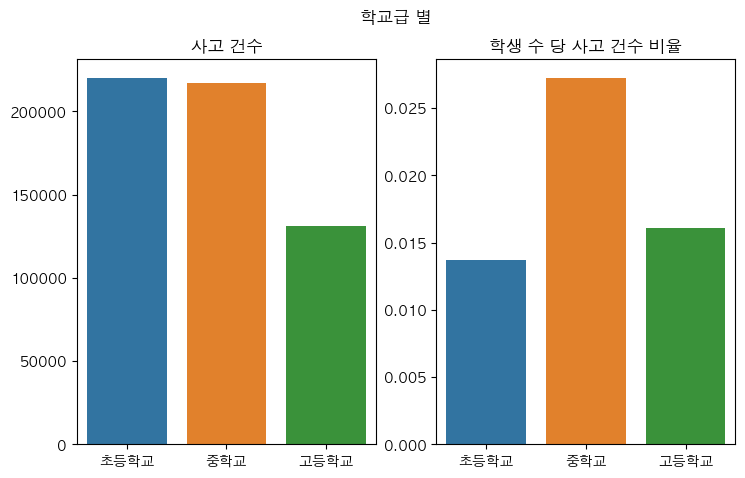

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(8.5, 5))

sns.barplot(x=school_levels, y=rates, ax=ax[1])
sns.barplot(x=school_levels, y=cases, ax=ax[0])
ax[0].set_title('사고 건수')
ax[1].set_title('학생 수 당 사고 건수 비율')
fig.suptitle('학교급 별')

### 2. 성별

In [70]:
# 성별
print(boys, girls)
print(boy_case, girl_case)

# 성별 사고건수 / 학생수
boy_rate = boy_case / boys
girl_rate = girl_case / girls

print(boy_rate)
print(girl_rate)

genders = ['남', '여']
gender_rates = [boy_rate, girl_rate]
gender_cases = [boy_case, girl_case]

16617997 15573089
411953 204055
0.0247895700065417
0.013103052323145395


Text(0.5, 0.98, '성별')

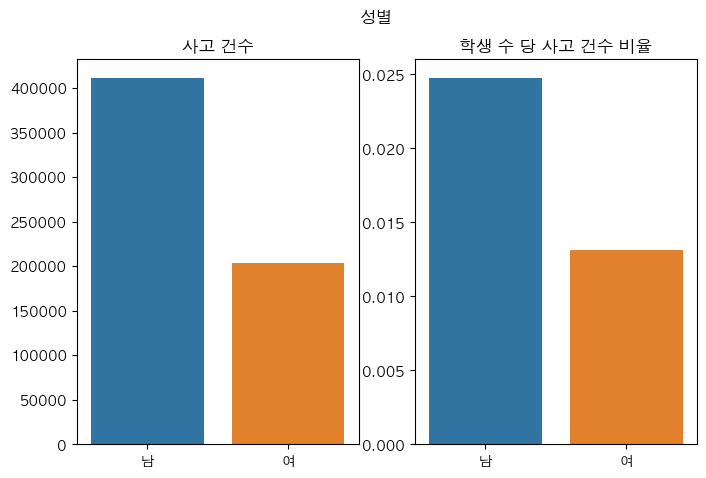

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

sns.barplot(x=genders, y=gender_rates, ax=ax[1])
sns.barplot(x=genders, y=gender_cases, ax=ax[0])
ax[0].set_title('사고 건수')
ax[1].set_title('학생 수 당 사고 건수 비율')
fig.suptitle('성별')

### 3. 설립유형별(사립, 국공립)

In [80]:
school_units = ['사립', '국공립']

unit_rates = [private_case/privates, public_case/publics]
unit_cases = [private_case, public_case]

print(unit_cases)

[115064, 500944]


Text(0.5, 0.98, '설립유형별')

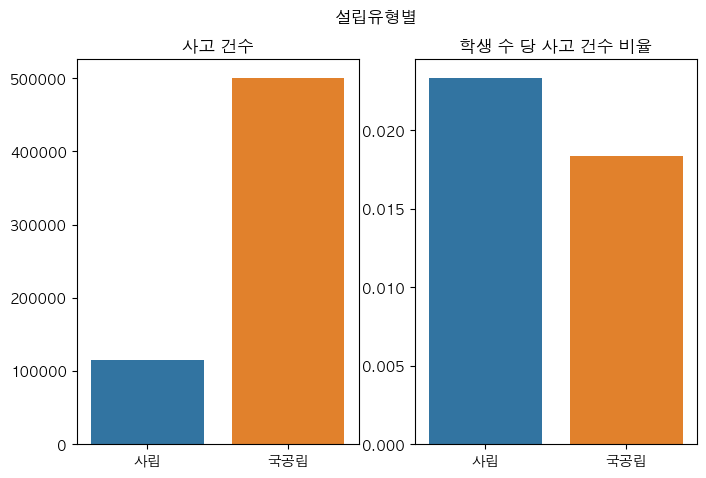

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

sns.barplot(x=school_units, y=unit_rates, ax=ax[1])
sns.barplot(x=school_units, y=unit_cases, ax=ax[0])
ax[0].set_title('사고 건수')
ax[1].set_title('학생 수 당 사고 건수 비율')
fig.suptitle('설립유형별')

### 4. 학년별

In [54]:
grades['사고건수/학생수'] = 0
grades

,0,학생수,사고건수,사고건수/학생수
0,초등1학년,2620034,24790,0
1,초등2학년,2664106,24865,0
2,초등3학년,2666466,29910,0
3,초등4학년,2692759,37694,0
4,초등5학년,2743189,47917,0
5,초등6학년,2706313,54443,0
6,중등1학년,2654308,77146,0
7,중등2학년,2642821,70414,0
8,중등3학년,2673593,69506,0
9,고등1학년,2678190,49484,0


In [55]:
grades['사고건수/학생수'] = grades['사고건수'] / grades['학생수']
grades

,0,학생수,사고건수,사고건수/학생수
0,초등1학년,2620034,24790,0.009462
1,초등2학년,2664106,24865,0.009333
2,초등3학년,2666466,29910,0.011217
3,초등4학년,2692759,37694,0.013998
4,초등5학년,2743189,47917,0.017468
5,초등6학년,2706313,54443,0.020117
6,중등1학년,2654308,77146,0.029064
7,중등2학년,2642821,70414,0.026643
8,중등3학년,2673593,69506,0.025997
9,고등1학년,2678190,49484,0.018477


Text(0.5, 0.98, '학년별')

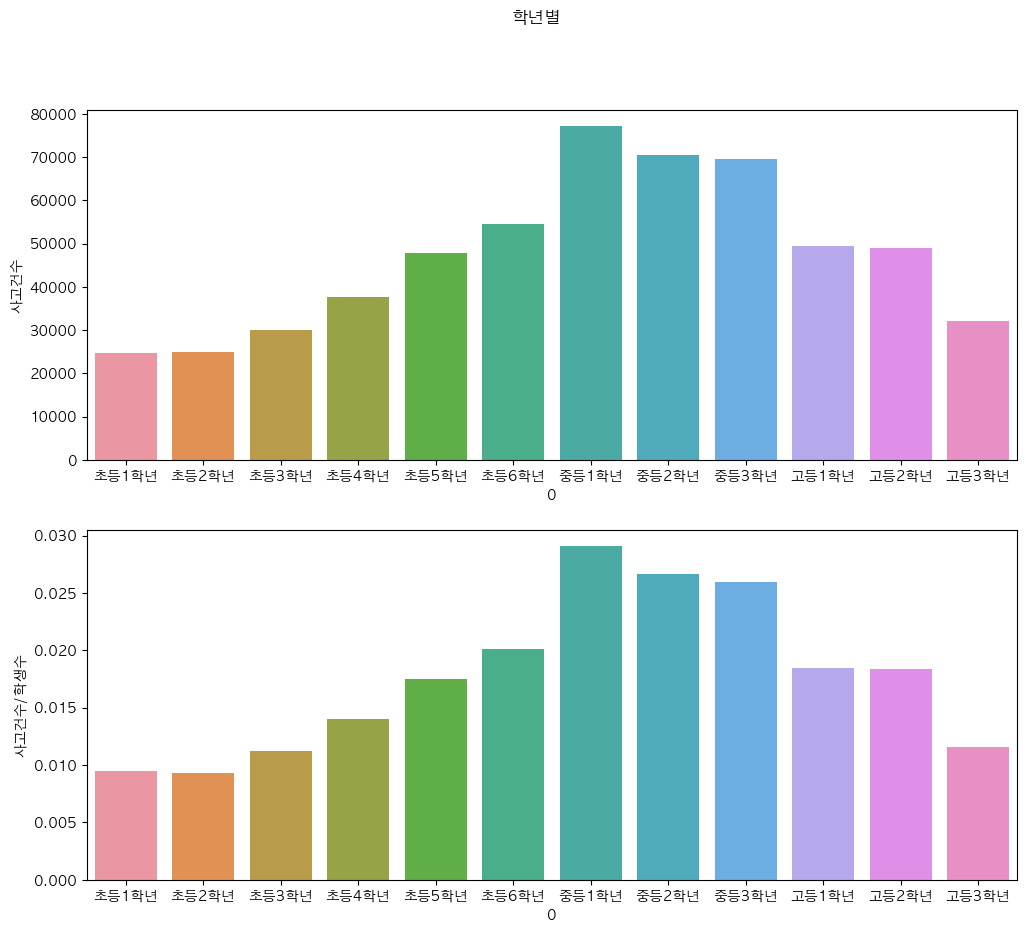

In [68]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.barplot(x=grades[0], y=grades['사고건수'], ax=ax[0])
sns.barplot(x=grades[0], y=grades['사고건수/학생수'], ax=ax[1])


fig.suptitle('학년별')

# 학년별로 학생 수가 비슷비슷해서 사고건수를 학생수로 나눠도 크게 달라지지 않음.

### 5. 지역별

In [113]:
areas['사고건수/학생수'] = 0
areas

,시도별,학생수,사고건수,사고건수/학생수
0,강원특별자치도,906424,22584,0
1,경기도,8922420,183390,0
2,경상남도,2231648,38864,0
3,경상북도,1554072,25269,0
4,광주광역시,1052631,18546,0
5,대구광역시,1510324,28459,0
6,대전광역시,976049,18230,0
7,부산광역시,1835193,34040,0
8,서울특별시,5024726,97223,0
9,세종특별자치시,318653,8998,0


In [114]:
areas['사고건수/학생수'] = areas['사고건수'] / areas['학생수']
areas

,시도별,학생수,사고건수,사고건수/학생수
0,강원특별자치도,906424,22584,0.024915
1,경기도,8922420,183390,0.020554
2,경상남도,2231648,38864,0.017415
3,경상북도,1554072,25269,0.01626
4,광주광역시,1052631,18546,0.017619
5,대구광역시,1510324,28459,0.018843
6,대전광역시,976049,18230,0.018677
7,부산광역시,1835193,34040,0.018548
8,서울특별시,5024726,97223,0.019349
9,세종특별자치시,318653,8998,0.028238


Text(0.5, 0.98, '시도별')

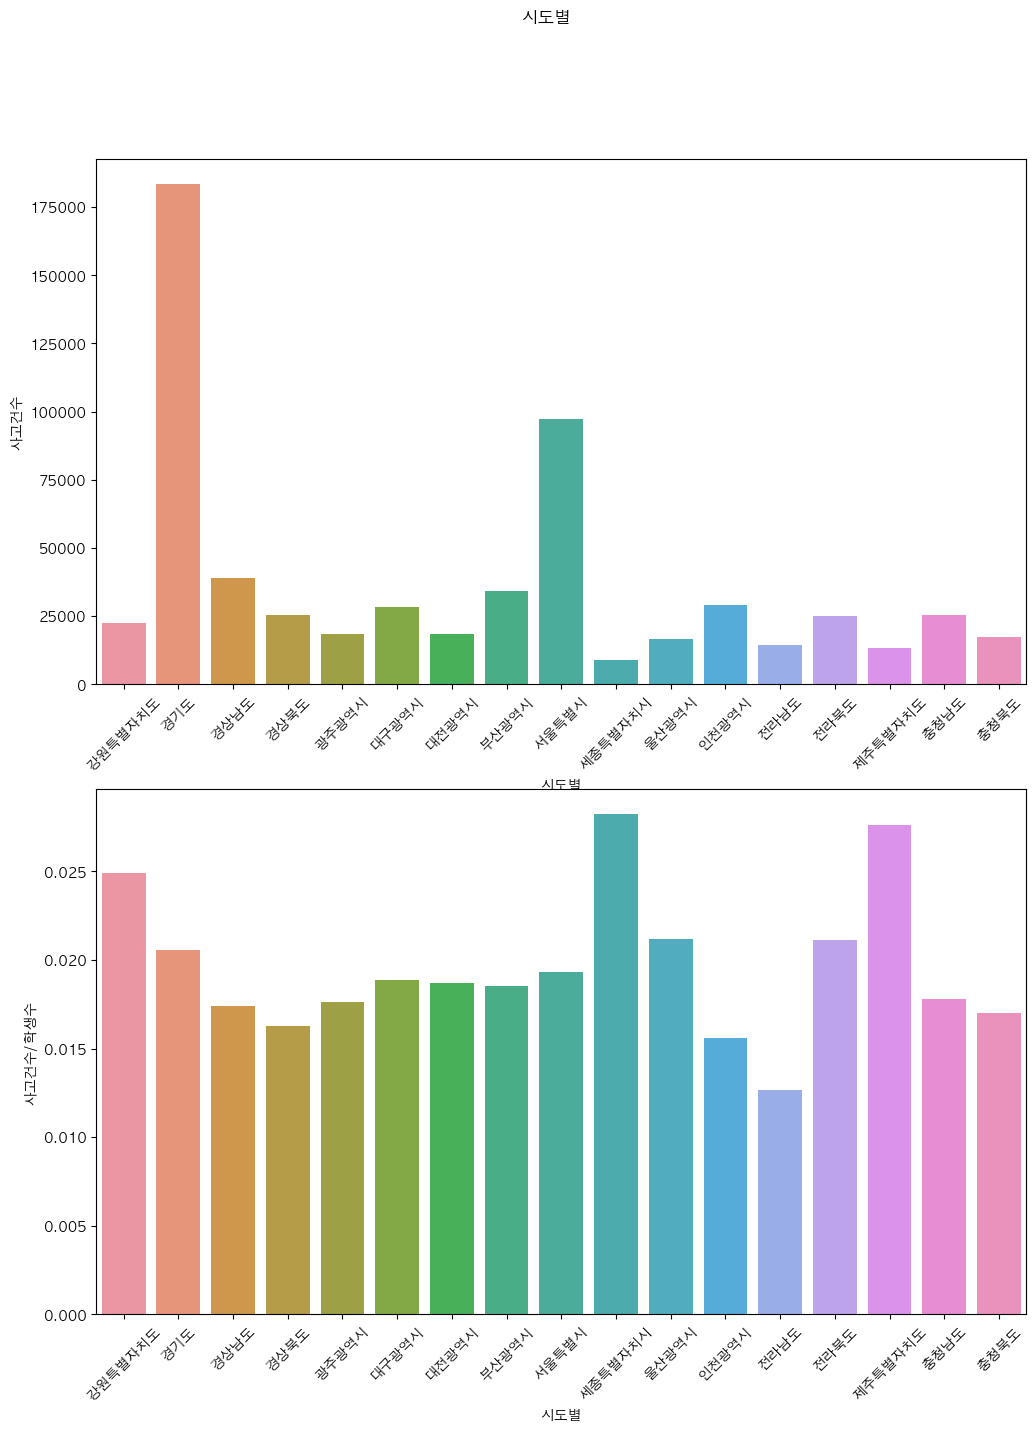

In [128]:
fig, ax = plt.subplots(2, 1, figsize=(12, 15))
sns.barplot(x=areas['시도별'], y=areas['사고건수'], ax=ax[0])
sns.barplot(x=areas['시도별'], y=areas['사고건수/학생수'], ax=ax[1])

ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

fig.suptitle('시도별')

In [ ]:
# 지역별 사고 유형?